In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [6]:
benin_data=pd.read_csv("../data/data/benin-malanville.csv")
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


### Task 2 

#### Summary statistics and missing value Report


In [55]:

benin_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [56]:
benin_data.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [57]:
# Data which have more than 5 null value
benin_data.isna().mean().loc[lambda x: x > 0.05]

Comments    1.0
dtype: float64

In [74]:
benin_data.shape

(525600, 19)

### Outlier Detections and Cleanings
 

In [75]:
benin_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [76]:
outlier_check_col=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB']

In [77]:
z_scores=benin_data[outlier_check_col].apply(zscore)
outlier=(np.abs(z_scores)>3).any(axis=1)

In [78]:
print(f"outliers: {outlier.sum()} rows")

outliers: 17843 rows


In [95]:
cleaned_data=benin_data[~outlier].copy()

In [96]:
cleaned_data.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         507757
dtype: int64

In [97]:
cleaned_data.to_csv("../data/benin_clean.csv", index=False)


In [98]:
cleaned_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

<Figure size 4000x500 with 0 Axes>

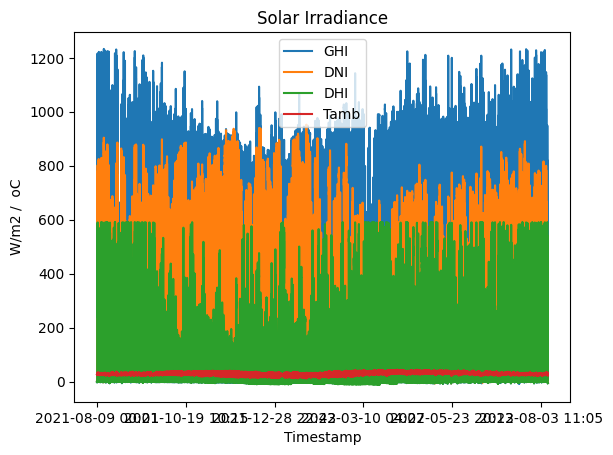

In [99]:
plt.figure(figsize=(40,5))
cleaned_data.set_index("Timestamp")[['GHI','DNI','DHI','Tamb']].plot()
plt.title("Solar Irradiance")
plt.ylabel('W/m2 /  oC')
plt.show()

### To visually analyse the the difference I could make it permonth

In [100]:
cleaned_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [101]:
cleaned_data['Timestamp']=pd.to_datetime(cleaned_data['Timestamp'])
cleaned_data.set_index('Timestamp',inplace=True)
monthly_data = cleaned_data.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


/tmp/ipykernel_41028/1050814831.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = cleaned_data.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


<Figure size 1500x600 with 0 Axes>

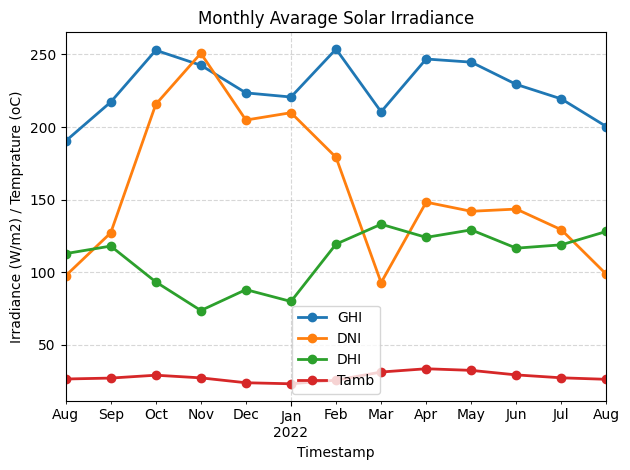

In [102]:
plt.figure(figsize=(15,6))
monthly_data.plot(marker='o',linewidth=2)
plt.title("Monthly Avarage Solar Irradiance")
plt.grid(True,linestyle='--',alpha=0.5)
plt.ylabel("Irradiance (W/m2) / Temprature (oC)")
plt.tight_layout()
plt.show()

This chart shows that, during oct and Nov, the the GHI and DNI is has peack value

### group by ModA and ModB

In [103]:
cleaned_group=cleaned_data.groupby('Cleaning')[['ModA','ModB']].mean()

<Axes: title={'center': 'Avarage ModA and ModB pre/cost cleaning'}, xlabel='Cleaning'>

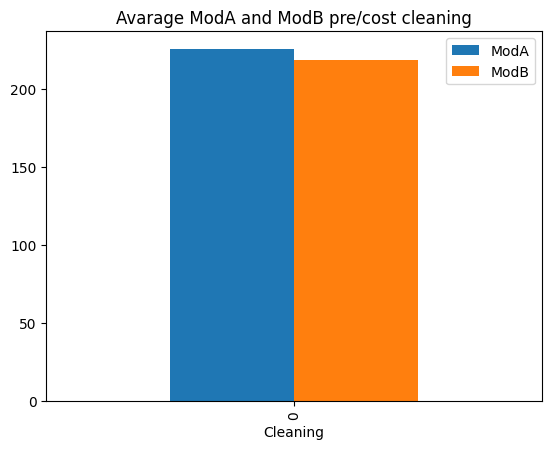

In [ ]:
cleaned_group.plot(kind='bar',title="Avarage ModA and ModB pre/cost cleaning")

### Heat map description

<Axes: >

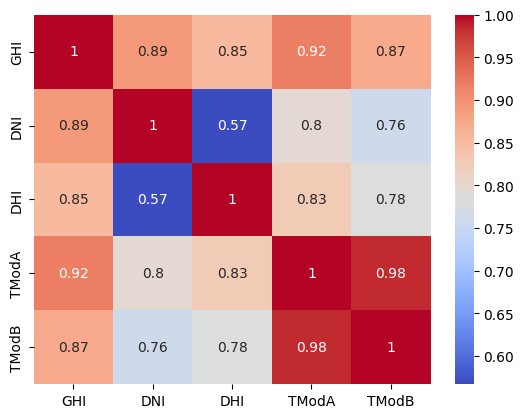

In [105]:
sns.heatmap(cleaned_data[['GHI','DNI','DHI','TModA', 'TModB']].corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='WS', ylabel='GHI'>

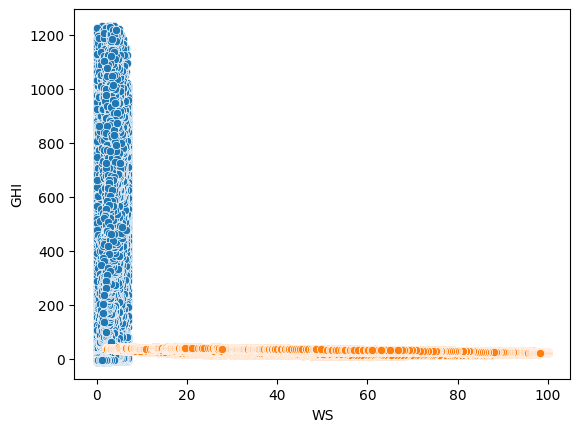

In [90]:
sns.scatterplot(data=cleaned_data, x='WS',y='GHI')
sns.scatterplot(data=cleaned_data, x='RH',y='Tamb')

In [ ]:
cleaned_group=cleaned_data.groupby('Cleaning')[['WS','WD']].mean()
cleaned_group.plot(kind='bar',title="radial bar plot of WS/WD")

<Axes: title={'center': 'Distribution of Global Horizontal Irradiance,'}, ylabel='Frequency'>

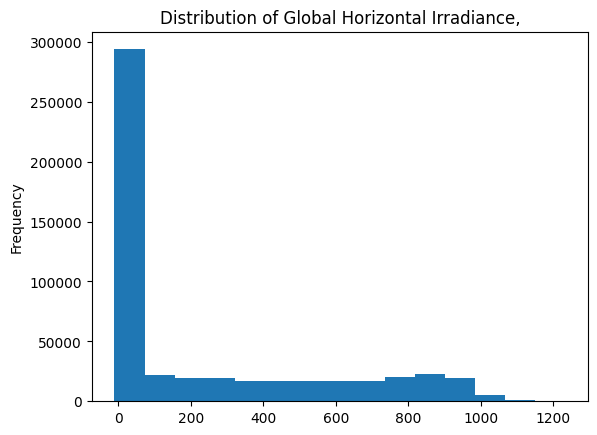

In [113]:
cleaned_data['GHI'].plot(kind='hist',bins=15,title='Distribution of Global Horizontal Irradiance,')


<Axes: title={'center': 'Distribution Of Distribution of Wind Speed"'}, ylabel='Frequency'>

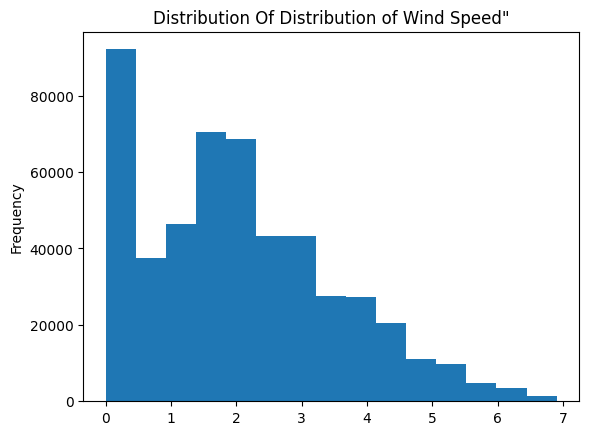

In [114]:
cleaned_data['WS'].plot(kind='hist',bins=15, title='Distribution Of Distribution of Wind Speed"')